# EEEN30101 Numerical Analysis

# Week 12

***&copy; 2024 Martínez Ceseña — University of Manchester, UK***

This notebook introduces the following topics associated with digital simulation:
- Euler's method
- Higher order methods

The use of the notebooks is optional and will not be marked. That said, you are strongly encouraged to play with the tools and examples, as you can explore different variations of the examples, which will better prepare you for the exams.

## List of contents

- [Euler's method](#Euler's-method)
  - [Introduction to digital simulation](#Introduction-to-digital-simulation)
  - [Application of Euler's method](#Application-of-Euler's-method)
  - [Examples of Euler's method](#Examples-of-Euler's-method)
  - [Error analysis of Euler's method](#Error-analysis-of-Euler's-method)
- [Higher order methods for digital simulation](#Higher-order-methods-for-digital-simulation)
- [Conclusion](#Conclusion)

## Before we begin

Before we begin: 
- Make sure to review the asynchronous materials provided in blackboard for EEEN30101 Week 12 
- If you have any questions, please post them in the discussion boards or, if that is not possible, send an email to alex.martinezcesena@manchester.ac.uk

This notebook provides some examples in python, for that purpose the following libraries will be loaded:

In [1]:
import math  # To use mathematical operation
import numpy as np  # To define and use matrices
import matplotlib.pyplot as plt  # To plot figures

try:
    import ipywidgets as widgets
except:
    import micropip
    await micropip.install('ipywidgets')
    import ipywidgets as widgets
from ipywidgets import interact

[Back to top](#EEEN30101-Numerical-Analysis)

## Python code

This notebook requires some algorithms that were developed in previous notebooks, which have been added below. Please review the relevant notebooks for information about these algorithms.

- Methods to model polynomials from the notebooks developed for week 04 ([EEEN30101_Week04](./EEEN30101_Week04.ipynb)):

In [2]:
def polynomial(x=[1], K=[1, 1]):
    '''Simulate value of polynomial'''
    s1 = len(x)
    s2 = len(K)
    y = np.zeros((s1))
    for i in range(s1):
        for j in range(s2):
            y[i] += K[j]*x[i]**j

    return y

- Methods to plot figures and legends from the notebooks developed for ([EEEN30101_Week04](./EEEN30101_Week04.ipynb)):

In [3]:
def plotFigure(X, Y, Label=[], xlabel='x', ylabel='J(x)', ax=math.nan):
    '''Plot a figure'''
    if ax.__class__ == math.nan.__class__:
        fig, ax = plt.subplots()

    for i in range(X.shape[0]):
        line, = ax.plot(X[i], Y[i], label=Label[i])

    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.grid()
    if '_child' not in line.get_label():
        plt.legend()
    plt.show()

def addPoints(ax, X, Y, Label1, Label2, Dx, Dy):
    '''Add points to figure'''
    mY= min(Y)
    for i in range(len(X)):
        ax.plot(X[i], Y[i], '*')
        ax.text(X[i]-Dx, mY-Dy, Label1[i])
        ax.text(X[i]+Dx, Y[i], Label2[i])

def plotFullFigures(X, Y, Label1, Label2, xlabel='x',
                    ylabel='J(x)', x=[0], y=[0], Label=['']):
    '''Plot a figure with both points and lines'''
    Dx = (max(X)-min(X))*2/100
    Dy = max( (max(Y)-min(Y))*2/10, (np.max(y)-np.min(y))*3/10)
    
    fig, ax = plt.subplots()

    addPoints(ax, X, Y, Label1, Label2, Dx, Dy)

    plotFigure(x, y, Label, xlabel, ylabel, ax)

[Back to top](#EEEN30101-Numerical-Analysis)

## Euler's method

### Introduction to digital simulation

As an introduction to digital simulation, let us consider the following example:

$$ \frac{\partial y}{\partial t} + ay = bu$$

If we sketch the realisation of this equation, we get:

<img src="Figures/Week12_Digital.png" alt="Fig01" class="bg-primary" width="450px">

Note that we included and additional variable $z$:

$$ z = \frac{\partial x}{\partial t}$$

To use digital simulation, we will replace the integrator ($\int$) with a discrete time approximation.

For that purpose, consider a time interval, $h$, of a short duration.

$$ t_{k+1} = t_k + h$$

Accordingly, the integral of $z$ until time $t_{k+1}$ can be calculated with two integrals, one until time $t_k$ and a second one from time $t_k$ until $t_k+1$.

$$
\begin{aligned}
  \int^{t_k+1} z(t) dt& =  \int^{t_k} z(t) dt + \int^{t_k+1}_{t_k} z(t) dt\\
   & = x_k + \int ^{t_k+1}_{t_k} z(t)dt 
\end{aligned}
$$

Let us now approximate the integral numerically using a rectangular rule. That is, the integral can be calculated as the area of a rectangle of height $z_k$ and width $h$.

$$
\begin{aligned}
  \int^{t_k+1} z(t) dt& =  x_k + \int ^{t_k+1}_{t_k} z(t)dt \\
   & \approx x_k + hz_k
\end{aligned}
$$

What we just did was to produce an estimation, $\hat{x}_{k+1}$, of the value of $x_{k+1}$, using the gradient of the function $z = \partial x / \partial t$ and the value of the interval $h$.

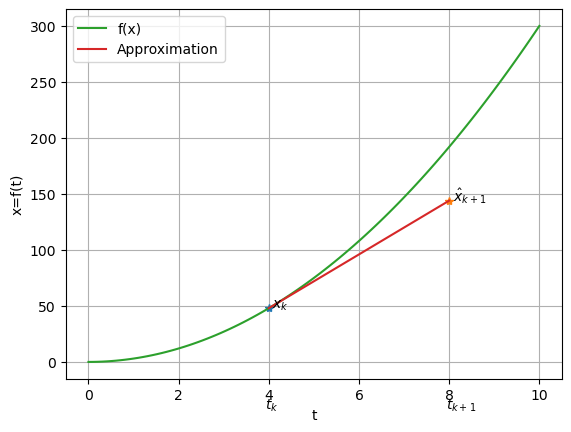

In [4]:
K1 = [0, 0, 3]
t = 4
x = np.zeros((2,100))
y = np.ones((2,100))
x[0] = np.linspace(0,10,100)
y[0] = polynomial(x[0], K1)
x[1] = np.linspace(t,8,100)
B = (polynomial([t+0.0001], K1)-polynomial([t], K1))/0.0001
A = polynomial([t], K1) -t*B
y[1] = A+B*x[1]

X = np.zeros((1,2))
Y = np.zeros((1,2))
X[0] = [t, 8]
Y[0] = [polynomial(X[0], K1)[0], A[0]+B[0]*X[0,1]]

Label1 = ['$t_k$', '$t_{k+1}$']
Label2 = ['$x_k$', '$\hat{x}_{k+1}$']
plotFullFigures(np.transpose(X), np.transpose(Y), Label1, Label2, 't',
                'x=f(t)', x, y,  ['f(x)', 'Approximation'])

This is known as Euler's method.

[Back to top](#EEEN30101-Numerical-Analysis)

### Application of Euler's method

Euler's method is an approach used to solve ODEs considering:

- Initial conditions, e.g., value of the function at a given point.
- The tangent of the function subject to the initial conditions, e.g., the gradient of the function at the selected point.

More generally, consider the following state space differential equation where the time derivative of $x$, $z(t)$ is a function of $x$, $u$, and $t$.

$$ z(t) = f(x, u, t)$$

Using our previous example (see block diagram), we can define $z(t)$ as:

$$ z(t) = u(t) - ax(t) $$

That is:

$$f(x, u, t) = u - ax$$

This is the gradient of our function $x$ evaluated at time $t_k$.

Let us explore the use of $f(x,u,t)$ by analysing how $x$ evolves as a function of time $t$. For this purpose, we will use the same example as before.

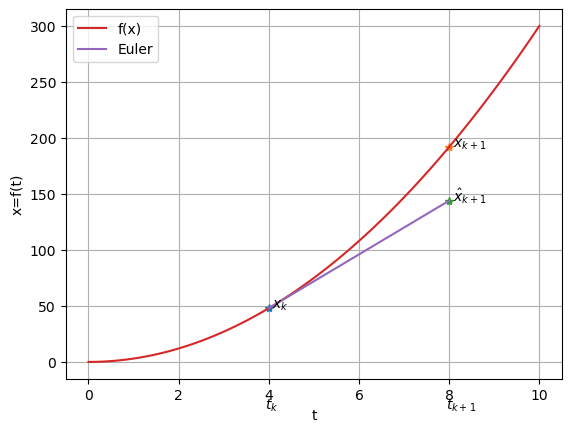

In [5]:
t = 4
x = np.zeros((2,100))
y = np.ones((2,100))
x[0] = np.linspace(0,10,100)
y[0] = polynomial(x[0], K1)
x[1] = np.linspace(t,8,100)
B = (polynomial([t+0.0001], K1)-polynomial([t], K1))/0.0001
A = polynomial([t], K1) -t*B
y[1] = A+B*x[1]

X = np.zeros((1,3))
Y = np.zeros((1,3))
X[0] = [t, 8, 8]
Y[0] = [polynomial(X[0], K1)[0], polynomial([8], K1)[0], A[0]+B[0]*X[0,1]]

Label1 = ['$t_k$', '', '$t_{k+1}$']
Label2 = ['$x_k$', '$x_{k+1}$', '$\hat{x}_{k+1}$']
plotFullFigures(np.transpose(X), np.transpose(Y), Label1, Label2, 't',
                'x=f(t)', x, y,  ['f(x)', 'Euler'])

Based on the results of the example, our predicted value $\hat{x}_{k+1}$ can be calculated as:

$$ \hat{x} =  x_k + h (gradient) $$

Which is the same as:

$$ \hat{x} =  x_k + (h)f(x_k, u_k, t_k)$$

[Back to top](#EEEN30101-Numerical-Analysis)

### Examples of Euler's method

Let us now explore the use of Euler's method with some examples:

Consider the following differential equation:

$$\frac{\partial x}{\partial t} = e^{-t}$$

And the following conditions:
- Case A: $t=0$ and $h=1$
- Case B: $t=1$ and $h=1$
- Case C: $t=1$ and $h=2$

For convenience, we will code this example as a python class.

In [6]:
class ExampleE:
    def __init__(self, K=[1, 1]):
        '''Initializing function'''
        self.K = K

    def get_value(self, x):
        '''Get value of the function'''
        return self.K[0]*math.exp(self.K[1]*x)

    def get_diff(self, x):
        '''Get differential'''
        return self.K[1]*self.get_value(x)
    
    def get_prnt(self, xt='x'):
        return '%.4f*'%(self.K[0])+'e(%.4f*'%(self.K[1])+xt+')'

    def get_prnt2(self, xt='x'):
        return '%.4f*'%(self.K[0]*self.K[1])+'e(%.4f*'%(self.K[1])+xt+')'

We know that, according to Euler's, method, we can approximate the value of the function $\hat{x}_{k+1}$ using the following formula.

$$
\begin{aligned}
  \hat{x} & =  x_k + h (gradient)\\
   & = x_k + h e^{-t_k}
\end{aligned}
$$

Also for convenience, we will code Euler's method as a python method.

In [7]:
def euler(Ex, t, h):
    '''f(t+h) = f(t) + h*df(t)/dt'''
    return Ex.get_value(t) + h*Ex.get_diff(t)

Before we begin, it is useful to obtain $x$ as:

$$
\begin{aligned}
  x & = \int e^{-t}\\
   & = -e^{-t}
\end{aligned}
$$

This equation will allow us to plot the function and calculate the relative error of our calculations.

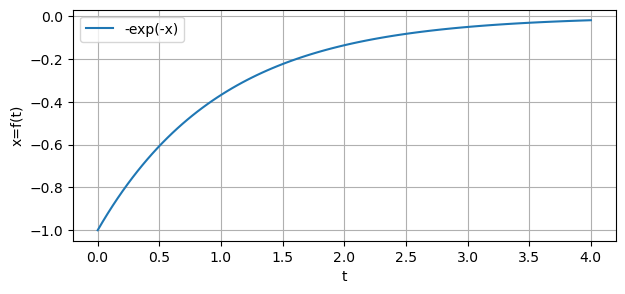

In [8]:
x=np.linspace(0,4,100)
y=np.linspace(0,4,100)
for i in range(100):
    y[i] = -1*math.exp(-1*x[i])
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x, y, label='-exp(-x)')
ax.set(xlabel='t', ylabel='x=f(t)')
ax.grid()
plt.legend()
plt.show()

After analysing the function and before solving the example, it can be deduced that:
- The result in Case A will be less accurate than that of case B because of the relatively high gradient at $t=0$
- The result in Case C will be less accurate than that of case B because of the relatively high $h=2$ value

You can verify these observations using the python method below:

In [9]:
@interact
def TestEuler(t = widgets.FloatSlider(min=0, max = 3, value=0, description='t: ', continuous_update=False),
              h = widgets.FloatSlider(min=0, max = 3, value=1, description='h: ', continuous_update=False)):
    Exe = ExampleE([-1, -1])
    print('f(t)   = '+Exe.get_prnt()+' = %.4f'%(Exe.get_value(t)))
    print('f(t+h) = f(%.4f)            = %.4f'%(t+h, Exe.get_value(t+h)))
    print('Euler estimation:               %.4f'%(euler(Exe, t, h)))
    Err = np.abs(Exe.get_value(t+h)-euler(Exe, t, h))
    Err2 = np.abs((Exe.get_value(t+h)-euler(Exe, t, h))/Exe.get_value(t+h))
    print('Absolute Error                  %.4f'%Err)
    print('Relative Error                  %.4f'%Err2)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t: ', max=3.0), FloatSlider…

The results highlight that The accuracy of Euler's method decreases when:
- The gradient of the function across the $h$ interval varies significantly
- The magnitude of $h$ increases

[Back to top](#EEEN30101-Numerical-Analysis)

### Error analysis of Euler's method

Now that we have defined Euler's method for the simulation of differential equations and have solved some examples, it is time to explore in detail the accuracy of the method.

As a starting point, let us remember the equation for Euler's method:

$$ \hat{x}_{k+1} =  x_k + (h)f(x_k, u_k, t_k)$$

With $t_{k+1} = t_k + h$

Let us begin by analysing a simple one step ahead prediction, also known as a local analysis.

First assume the simulated value $x_k$ is equal to the true value of the function $x(t_k)$:

$$x_k = x(t_k)$$

Based on the assumption, we will try to calculate the error as the difference between the real value of the function ($x(t_{k+1})$) and our predicted value ($\hat{x}_{k+1}$).

$$ \epsilon_{k+1} = x(t_{k +1}) - \hat{x}_{k+1} $$

Solving the equation, we get:
$$
\begin{aligned}
   \epsilon_{k+1} & = x(t_{k +1}) - \hat{x}_{k+1}\\
   & = x(t_k +h) -x_k - (h)f(x_k, u_k, t_k)\\
   & = x(t_k + h) - x(t_k) -h \begin{array}{c|}\frac{\partial x}{\partial t}\end{array} _{t_k} 
\end{aligned}
$$

As done in previous weeks, we will use Taylor's theorem to produce a more manageable approximation of this equation:

$$
x(t_k + h) = x(t_k) + h \begin{array}{c|} \frac{\partial x}{\partial t}\end{array} _{t_k} + \frac{h^2}{2} \begin{array}{c|} \frac{\partial ^2 x}{\partial t^2}\end{array} _{t_k + \xi}
$$

For some $0 \leq \xi \leq h$

After rearranging the equation, we get:

$$
\begin{aligned}
   \epsilon_{k+1} & = x(t_k + h) - x(t_k) -h \begin{array}{c|}\frac{\partial x}{\partial t}\end{array} _{t_k} \\
   & = x(t_k) + h \begin{array}{c|} \frac{\partial x}{\partial t}\end{array} _{t_k} + \frac{h^2}{2} \begin{array}{c|} \frac{\partial ^2 x}{\partial t^2}\end{array} _{t_k + \xi} - x(t_k) -h \begin{array}{c|}\frac{\partial x}{\partial t}\end{array} _{t_k} \\
   & = \frac{h^2}{2} \begin{array}{c|} \frac{\partial ^2 x}{\partial t^2}\end{array} _{t_k + \xi}
\end{aligned} \\
$$

Based on the big $O$ notation, the local error is $O(h^2)$

To do a global analysis we will set the simulated value $x_{k+1}$ as our predicted value $\hat{x}_{k+1}$. We will then have to analyse if the results converge after multiple iterations.

$$x_{k+1} = \hat{x}_{k+1}$$

[Back to top](#EEEN30101-Numerical-Analysis)

To illustrate the convergence of Euler's method, consider the example below (the same example used as an introduction to digital simulation).

$$ \frac{\partial y }{\partial t} + ay(t) = bu(t)$$

Assume $a > 0$ so that our system is stable.

Also consider the following conditions:
-  $y(0)=0$
- $u(t)=1$ for $t \geq 0$ 

To solve this problem, we can use the Laplace transform:

$$ sy(s) + ay(s) = bu(s) $$

$$ y(s)(s+a) = bu(s) $$

$$ y(s)= \frac{b}{s+a}u(s) $$

Considering our step function $u(s) = 1/s$ we get:

$$
\begin{aligned}
   y(s) & = \frac{b}{s+a}\frac{1}{s}\\
   & = \frac{b}{a} \left( \frac{a}{s(s+a)} \right)\\
   & = \frac{b}{a} \left( \frac{a +s -s}{s(s+a)} \right) \\
   & = \frac{b}{a} \left( \frac{s + a}{s(s+a)} - \frac{s}{s(s+a)} \right)\\
   & = \frac{b}{a} \left( \frac{1}{s} - \frac{1}{s+a} \right)
\end{aligned} \\
$$

To convert the equation to the time domain, we can consider the following Laplace transforms.

$$ \mathcal{L}(1) = \frac{1}{s} $$

$$ \mathcal{L}(e^{at}) = \frac{1}{s-a} $$

The solution to the problem is therefore:

$$ y(t) = \frac{b}{a}(1-e^{-at})$$

Let us now solve the same problem using Euler's method iteratively.

We begin with the first iteration to predict $x_{k+1}$.

$$
\begin{aligned}
   x_{k+1} & = \hat{x}_{k+1}\\
   & = x_k + h (u_k - ax_k)\\
   & = (1-ah)x_k + h
\end{aligned}
$$

We can then use our predicted value $\bar{x}_{k+1}$ to simulate $\hat{x}_{k+2}$.

$$
\begin{aligned}
   x_{k+2} & = (1-ah)\hat{x}_{k+1} + h\\
   & = (1-ah) ((1-ah)x_k + h) + h\\
   & = (1-ah)^2x_k + (1-ah)h + h
\end{aligned}
$$

And we can continue for $n$ iterations.

$$
\begin{aligned}
   x_{k+n} & = (1+ah)^nx_k+(1+ah)^{n-1}h + \cdots + h \\
   & = (1+ah)^nx_k + \frac{1-(1-ah)^n}{1-(1-ah)} h \\
   & = (1+ah)^nx_k + \frac{1-(1-ah)^n}{a}
\end{aligned}
$$

If we set our initial value to zero $x_0 = 0$, we get:

$$
\begin{aligned}
   x_{k+n} & = (1+ah)^n (0) + \frac{1-(1-ah)^n}{a} \\
   & = \frac{1-(1-ah)^n}{a}
\end{aligned}
$$

Accordingly:

$$
\begin{aligned}
   y_n & = bx_n\\
   & = \frac{b}{a} [1-(1-ah)^n]
\end{aligned}
$$

From the equation, it can be deduced that the method will not converge when:

$$|1-ah| > 1$$

Accordingly, for a stable simulation, we require
$$h < \frac{2}{a}$$

To estimate the global error, we just need to compare the real and estimated values:

$$
\begin{aligned}
   y(t_n) - y_n & = \frac{b}{a} [1-e^{at_n}] - \frac{b}{a} [1-(1-ah)^n]\\
   & = \frac{b}{a} \left[ \begin{aligned}
  \underbrace{ \quad \quad \quad (1-ah)^n - e^{-anh} \quad \quad \quad } \\
  \text{Both quantities} \longrightarrow 0 \; \text{as} \; n \longrightarrow \infty
\end{aligned}  \right]
\end{aligned}
$$

$$
\begin{aligned}
   y(t_n) - y_n & = \frac{b}{a} [1-e^{at_n}] - \frac{b}{a} [1-(1-ah)^n]\\
   & = \begin{aligned} \frac{b}{a} \left[
  \underbrace{ \quad \quad \quad \quad (1-ah)^n - e^{-anh} \quad \quad \quad \quad} \right] \\
  \text{Both quantities} \longrightarrow 0 \; \text{as} \; n \longrightarrow \infty \quad \; \;
\end{aligned}  
\end{aligned}
$$

[Back to top](#EEEN30101-Numerical-Analysis)

## Higher order methods for digital simulation

So far, we have explored the use of Euler's method which predicts values based on the gradient of the function at the current point. In practice, we can use other approaches, such as higher order methods, to provide potentially better solutions.

To explore this idea, let us consider the time derivative of a dynamic system.

$$ z = f(x, u, t) $$

And the aim to predict a future value $\hat{x}_{k+1}$ at time $t_{k+1} = t_k + h$.

Let us begin with Euler's method:

$$ \hat{x}_{k+1} =  x_k + (h)f(x_k, u_k, t_k)$$


This time, we will generalise the equation, so that we can consider alternative formulations for the slope of the function.

$$ \hat{x}_{k+1} = x_k + hf$$

That is, we will explore $f$ values and equations that better approximate the slope of the function ($\frac{\partial x}{\partial t}$) on the interval $[t_k, t_k+h]$

The first option that we will consider is **Heun's method**, where the slope is taken as the mean between two gradients.
$$f = \frac{f_1+f_2}{2}$$

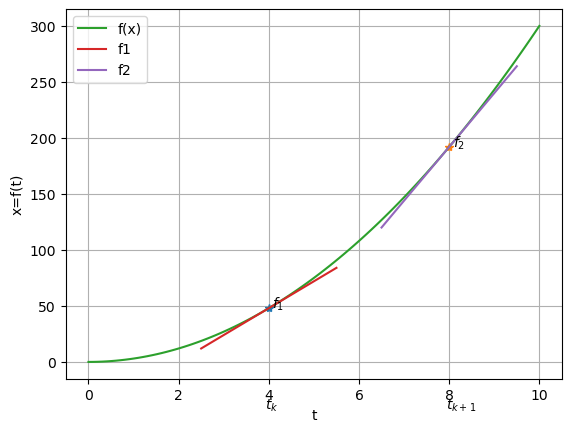

In [10]:
x = np.zeros((3,100))
y = np.ones((3,100))
x[0] = np.linspace(0,10,100)
y[0] = polynomial(x[0], K1)
x[1] = np.linspace(2.5,5.5,100)
x[2] = np.linspace(6.5,9.5,100)
B = (polynomial([4+0.0001], K1)-polynomial([4], K1))/0.0001
A = polynomial([4], K1) -4*B
y[1] = A+B*x[1]
B = (polynomial([8+0.0001], K1)-polynomial([8], K1))/0.0001
A = polynomial([8], K1) -t*B
y[2] = A+B*x[1]

X = np.zeros((1,2))
Y = np.zeros((1,2))
X[0] = [4, 8]
Y[0] = [polynomial(X[0], K1)[0], polynomial([8], K1)[0]]

Label1 = ['$t_k$', '$t_{k+1}$']
Label2 = ['$f_1$', '$f_2$']
plotFullFigures(np.transpose(X), np.transpose(Y), Label1, Label2, 't',
                'x=f(t)', x, y,  ['f(x)', 'f1', 'f2'])

Note that $f_2$ is calculated based on a predicted value (e.g., Euler's estimate).

$$
f_2 = f( \begin{aligned} \underbrace{\quad \quad \bar{x}^E_{k+1} \quad \quad } \\
\text{Euler's estimate}\end{aligned}, \begin{aligned}
  \underbrace{ u_{k+1}, t_{k+1}} \\
  \text{Known}
\end{aligned} )
$$

[Back to top](#EEEN30101-Numerical-Analysis)

The second option that we will consider is the **Midpoint method** which involves selecting a gradient $f_m$ in the midpoint between $t_k$ and $t_{k+1}$.

$$f=f_m$$

It is assumed that $t_{k+1/2}$ and $u+{k+1/2}$ are known.

$$t_{k+1/2} = t_k + h/2$$

$$u_{k+1/2} = u(t_k + h/2)$$

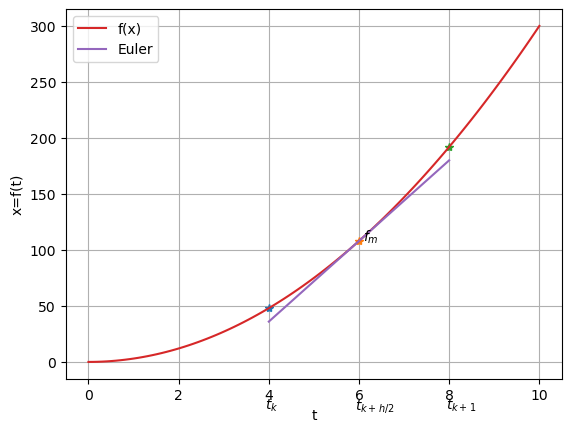

In [11]:
t = 6
x = np.zeros((2,100))
y = np.ones((2,100))
x[0] = np.linspace(0,10,100)
y[0] = polynomial(x[0], K1)
x[1] = np.linspace(4,8,100)
B = (polynomial([t+0.0001], K1)-polynomial([t], K1))/0.0001
A = polynomial([t], K1) -t*B
y[1] = A+B*x[1]

X = np.zeros((1,3))
Y = np.zeros((1,3))
X[0] = [4, 6, 8]
Y[0] = [polynomial(X[0], K1)[0], polynomial([6], K1)[0], polynomial([8], K1)[0]]

Label1 = ['$t_k$', '$t_{k+h/2}$', '$t_{k+1}$']
Label2 = [' ', '$f_{m}$', ' ']
plotFullFigures(np.transpose(X), np.transpose(Y), Label1, Label2, 't',
                'x=f(t)', x, y,  ['f(x)', 'Euler'])

Accordingly:

$$ f_m = f(\hat{x}^E_{k+1/2}, u_{k+1/2},t_{k+1/2}) $$

$$\hat{x}^E_{k+1/2} - x_k + \frac{h}{2} f_1 (x_k, u_k, t_k)$$

In practice, much higher order methods are often used, and $h$ is chosen adaptively (i.e., a new value of $h$ is chosen after each iteration).

[Back to top](#EEEN30101-Numerical-Analysis)

## Conclusion

At the end of this week's lecture and after going through this notebook, you should be able to address the following questions:<br/>
- What is Euler's method, and how is it used?<br/>
- What is Heun's method, and how is it used?<br/>
- What is the Midpoint method, and how is it used?<br/><br/>

If you cannot answer these questions, you may want to check again this notebook and the lecture notes.

[Back to top](#EEEN30101-Numerical-Analysis)